# Import all required libraries

In [8]:
import string
import re
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

# Loading Data


In [9]:
german_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.de-en.de", "utf-8", header=None, names=["German"])


<ipython-input-9-0c0f36ae8565>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  german_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.de-en.de", "utf-8", header=None, names=["German"])
<ipython-input-9-0c0f36ae8565>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  german_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.de-en.de", "utf-8", header=None, names=["German"])


In [10]:
french_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.fr-en.fr", "utf-8", header=None, names=["French"])


<ipython-input-10-3e98db44cb7e>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  french_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.fr-en.fr", "utf-8", header=None, names=["French"])
<ipython-input-10-3e98db44cb7e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  french_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.fr-en.fr", "utf-8", header=None, names=["French"])


In [11]:
bulgarian_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.bg-en.bg", "utf-8", header=None, names=['Bulgarian'])


<ipython-input-11-bd6ceb8b4e81>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  bulgarian_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.bg-en.bg", "utf-8", header=None, names=['Bulgarian'])
<ipython-input-11-bd6ceb8b4e81>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bulgarian_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.bg-en.bg", "utf-8", header=None, names=['Bulgarian'])


In [12]:
czech_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.cs-en.cs", "utf-8", header=None, names=['Czech'])


<ipython-input-12-0bf31ae4abac>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  czech_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.cs-en.cs", "utf-8", header=None, names=['Czech'])
<ipython-input-12-0bf31ae4abac>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  czech_df = pd.read_csv("/content/drive/MyDrive/Language Detection/europarl-v7.cs-en.cs", "utf-8", header=None, names=['Czech'])


In [13]:
danish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.da-en.da', "utf-8", header=None, names=['Danish'])


<ipython-input-13-d30242870f1f>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  danish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.da-en.da', "utf-8", header=None, names=['Danish'])
<ipython-input-13-d30242870f1f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  danish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.da-en.da', "utf-8", header=None, names=['Danish'])


In [14]:
finnish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.fi-en.fi', "utf-8", header=None, names=['Finnish'])


<ipython-input-14-4be94f013771>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  finnish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.fi-en.fi', "utf-8", header=None, names=['Finnish'])
<ipython-input-14-4be94f013771>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  finnish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.fi-en.fi', "utf-8", header=None, names=['Finnish'])


In [15]:
hungarian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.hu-en.hu', 'utf-8', header=None, names=['Hungarian'])


<ipython-input-15-6cab37b721bc>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  hungarian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.hu-en.hu', 'utf-8', header=None, names=['Hungarian'])
<ipython-input-15-6cab37b721bc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  hungarian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.hu-en.hu', 'utf-8', header=None, names=['Hungarian'])


In [16]:
latvian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.lv-en.lv', 'utf-8', header=None, names=['Latvian'])


<ipython-input-16-155a635b2a62>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  latvian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.lv-en.lv', 'utf-8', header=None, names=['Latvian'])
<ipython-input-16-155a635b2a62>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  latvian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.lv-en.lv', 'utf-8', header=None, names=['Latvian'])


In [17]:
dutch_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.nl-en.nl', 'utf-8', header=None, names=['Dutch'])


<ipython-input-17-a0ec6f136d23>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dutch_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.nl-en.nl', 'utf-8', header=None, names=['Dutch'])
<ipython-input-17-a0ec6f136d23>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dutch_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.nl-en.nl', 'utf-8', header=None, names=['Dutch'])


In [18]:
polish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.pl-en.pl', 'utf-8', header=None, names=['Polish'])


<ipython-input-18-94d80ac7388b>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  polish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.pl-en.pl', 'utf-8', header=None, names=['Polish'])
<ipython-input-18-94d80ac7388b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  polish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.pl-en.pl', 'utf-8', header=None, names=['Polish'])


In [19]:
portuguese_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.pt-en.pt', 'utf-8', header=None, names=['Portuguese'])


<ipython-input-19-62bfcd337e0e>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  portuguese_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.pt-en.pt', 'utf-8', header=None, names=['Portuguese'])
<ipython-input-19-62bfcd337e0e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  portuguese_data = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.pt-en.pt', 'utf-8', header=None, names=['Portuguese'])


In [20]:
romanian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.ro-en.ro', 'utf-8', header=None, names=['Romanian'])


<ipython-input-20-f8c84348d705>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  romanian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.ro-en.ro', 'utf-8', header=None, names=['Romanian'])
<ipython-input-20-f8c84348d705>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  romanian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.ro-en.ro', 'utf-8', header=None, names=['Romanian'])


In [21]:
slovenian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.sl-en.sl', 'utf-8', header=None, names=['Slovenian'])


<ipython-input-21-adda90a6b86b>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  slovenian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.sl-en.sl', 'utf-8', header=None, names=['Slovenian'])
<ipython-input-21-adda90a6b86b>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  slovenian_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.sl-en.sl', 'utf-8', header=None, names=['Slovenian'])


In [22]:
swedish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.sv-en.sv', 'utf-8', header=None, names=['Swedish'])


<ipython-input-22-569d199f98ae>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  swedish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.sv-en.sv', 'utf-8', header=None, names=['Swedish'])
<ipython-input-22-569d199f98ae>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  swedish_df = pd.read_csv('/content/drive/MyDrive/Language Detection/europarl-v7.sv-en.sv', 'utf-8', header=None, names=['Swedish'])


# Data Preprocessing

In [23]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [24]:
stack = [german_df,french_df,bulgarian_df,czech_df,danish_df,finnish_df,hungarian_df,latvian_df,dutch_df,polish_df,portuguese_data,romanian_df,slovenian_df,swedish_df]
lang = ["German","French",'Bulgarian','Czech','Danish','Finnish','Hungarian','Latvian','Dutch','Polish','Portuguese','Romanian','Slovenian','Swedish']

In [25]:
def data_clean(df,lang,data_test,data_lang):
  df = df.iloc[:5000]
  data_eng = []
  lang_eng = []

  for i, line in df.iterrows():
      line = line[lang]
      if len(line) !=0:
          line = line.lower()
          line = re.sub(r"\d+", "", line)
          line = line.translate(translate_table)
          data_eng.append(line)
          lang_eng.append(lang)
  data_test += data_eng
  data_lang += lang_eng

In [26]:
text = []
language = []
for i in range(0,14):
  data_clean(stack[i],lang[i],text,language)

# Transforming the data into a single dataset

In [33]:
df = df = pd.DataFrame({
    "Text" : text,
    "Language" : language
})
df.head()

,Text,Language
0,wiederaufnahme der sitzungsperiode,German
1,ich erkläre die am freitag dem dezember unter...,German
2,wie sie feststellen konnten ist der gefürchtet...,German
3,im parlament besteht der wunsch nach einer aus...,German
4,heute möchte ich sie bitten das ist auch der ...,German


<Axes: xlabel='Language', ylabel='count'>

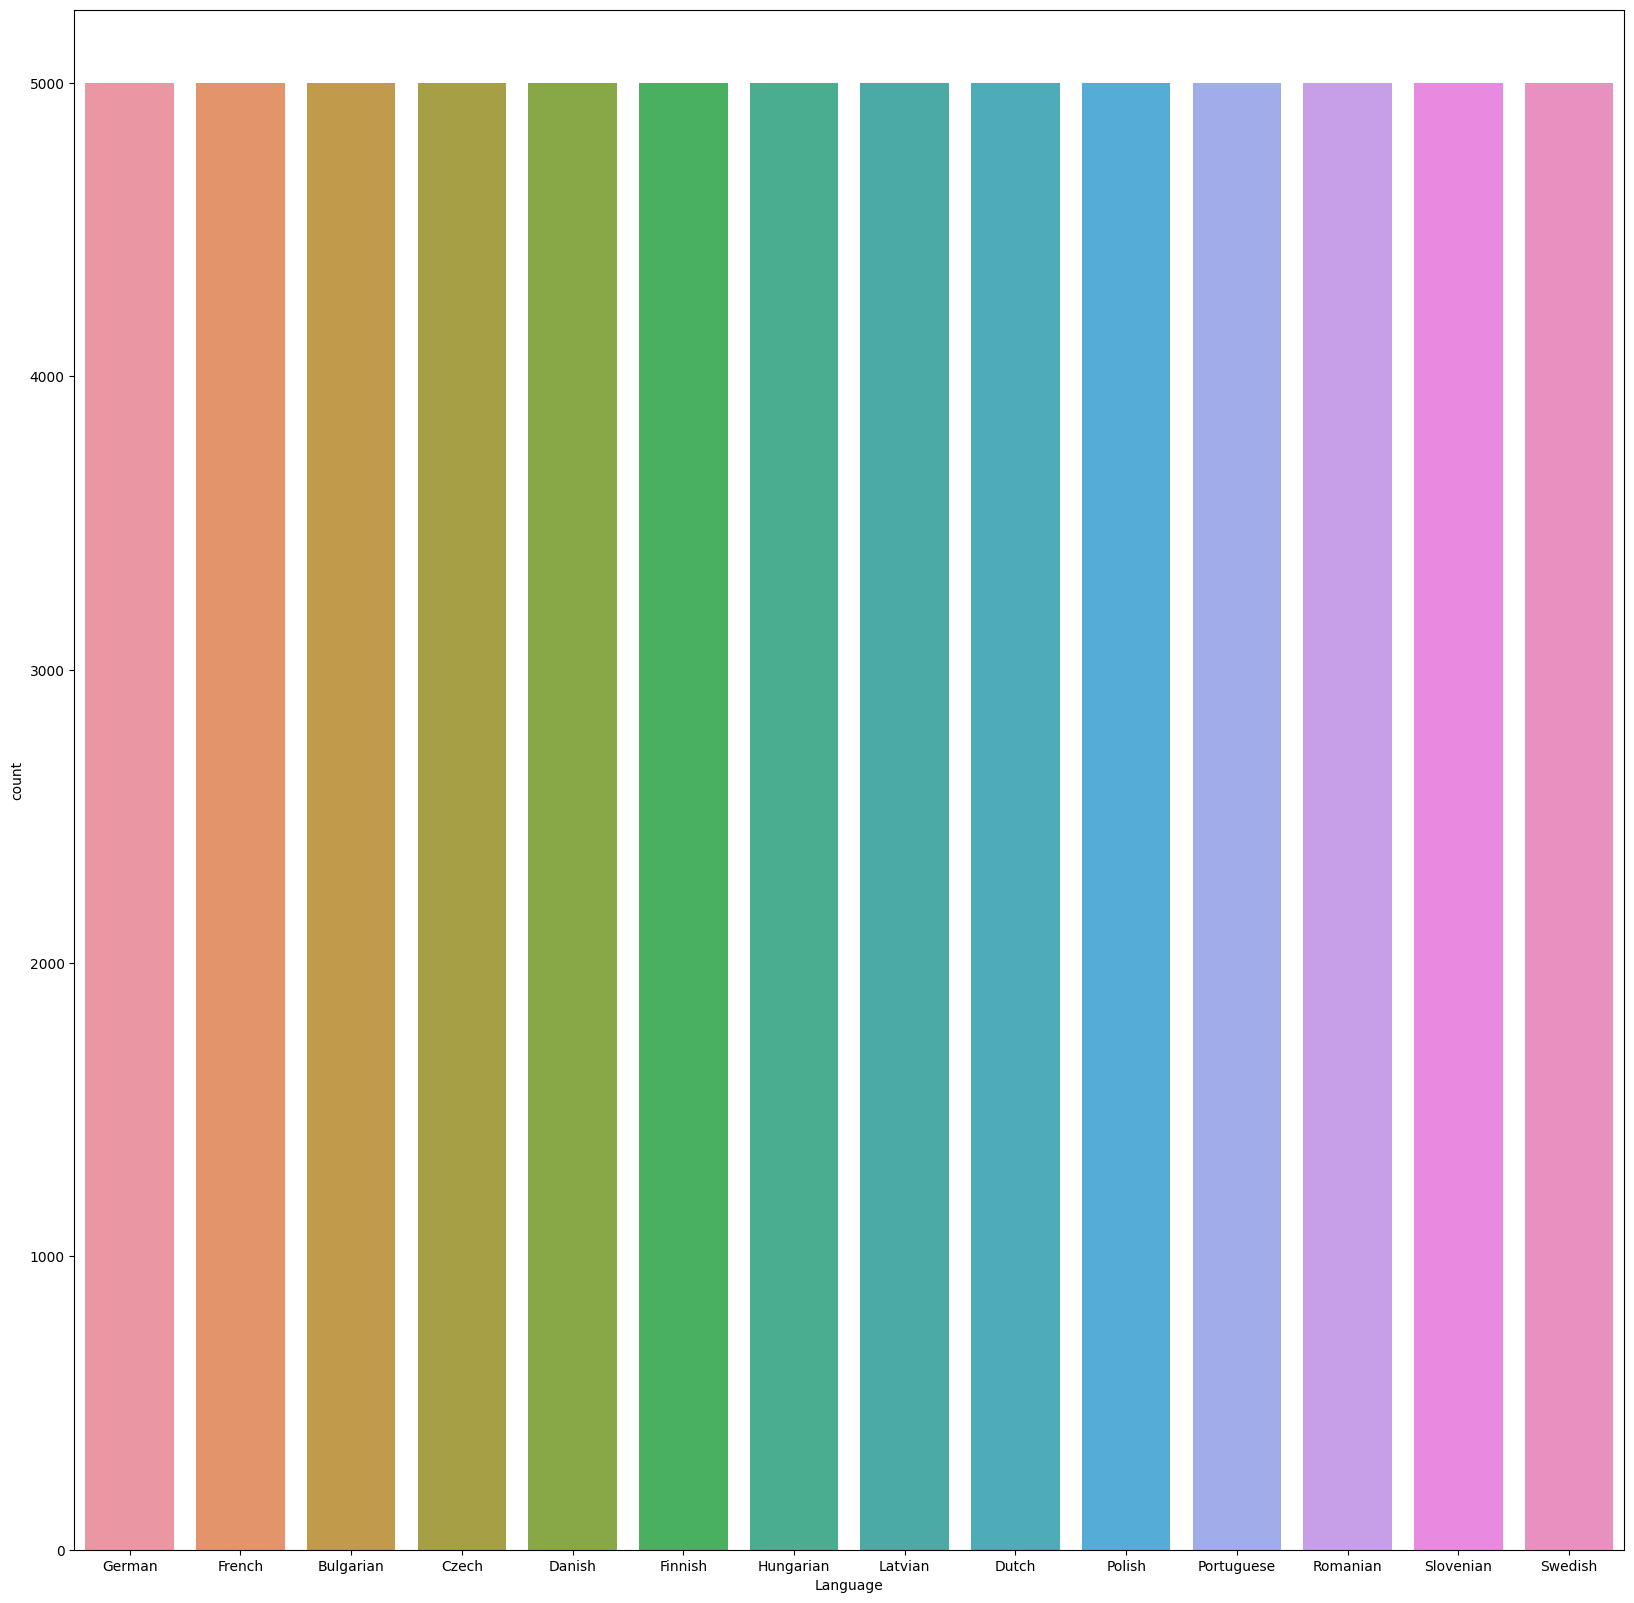

In [34]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df)

# Splitting the dataset


Splitting the dataset into Independent and Dependent variables

In [35]:
x = df.iloc[:,0] # Independent Variable
y = df.iloc[:,1] # Dependent Variable

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying TF-IDF Vectorizer

In [37]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [38]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [39]:
pipe_mnb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [40]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

In [41]:
pipe_lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('lr_clf', LogisticRegression())])

# Model Prediction for Logistic Regression

In [42]:
lr_predicted = pipe_lr.predict(x_test)

# Model evaluation for Logistic Regression

In [43]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

The logistic regression has: 91.87142857142857 % accuracy


# Model Prediction for MultinomialNB

In [44]:
mnb_predicted = pipe_mnb.predict(x_test)

# Model Evaluation for MultinomialNB

In [45]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 90.60714285714285 % accuracy


# Evaluation matrix for Logistic Regression

In [46]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[ 877    1    0    1    0    0    7    1    2   10    2   94    2    0]
 [ 103  838    0    0    0    1    6    3    0    6    0   22    4    0]
 [   2    0  977    0    0    0    0    0    0    1    0    1    2    2]
 [   0    1    0  990    0    0    0    1    0    0    0    2    1    0]
 [   2    0    0    0  971    0    0    0    1    0    0    1    1    0]
 [   0    0    0    0    0 1011    0    2    0    0    0    1    0    0]
 [   4    0    0    2    0    0  983    0    1    2    0    2    0    0]
 [  99    3    0    0    0    4    0  875    2    6    1   29    1    0]
 [ 100    3    0    0    0    1    0    2  895    6    0   23    2    0]
 [ 122    2    0    0    0    1    1    1    2  890    2   21    0    0]
 [   3    0    0    0    0    0    0    0    0    0 1001    3    0    0]
 [ 238    1    0    0    1    2    6    2    1   11    2  724    2    0]
 [  85    1    0    0    0    5    2    1    1    5    1   30  873    0]
 [   0    0    1    0    0    0

In [47]:
import pickle


In [48]:
lrfile = open('lrmodel.pckl', 'wb')
pickle.dump(pipe_lr, lrfile)
lrfile.close()